# PGD Attack and Binary Input Detector Using CIFAR10

### **Projected Gradient Descent (PGD) Attack - Overview**


The Projected Gradient Descent (PGD) attack is a popular method used to generate adversarial examples for neural networks, particularly for tasks like image classification. It belongs to the family of iterative attacks, meaning that instead of just perturbing the input once, it repeatedly refines the perturbation to gradually mislead the model. PGD is often considered a more robust attack than the simple Fast Gradient Sign Method (FGSM) because it involves multiple steps, allowing for more powerful adversarial examples.

**Key Concepts:**

* **Adversarial Example:** A modified input that is designed to cause the model to make an incorrect prediction.
* **Adversarial Perturbation:** A small change to the original input that makes the model misclassify it.
* **Projected Gradient Descent (PGD):** An iterative method that modifies the input by applying gradient-based steps and then projects it back to a feasible region to ensure the perturbation is constrained.

**Steps in PGD Attack**

The core idea behind PGD is to iteratively update the input using the gradient of the loss function with respect to the input, ensuring that each update stays within a certain bound (usually the $ℓ_{∞}$​ norm).

**1. Initialization:**

PGD starts with an input $x_{0}$​ (the original image) and adds a small random noise to it, creating an initial perturbed input $x_{0}+δ_{0}​$. The perturbation is bounded by a maximum allowed norm (usually the $ℓ∞$​-norm).

**2. Gradient Step:**

In each iteration, the attack computes the gradient of the loss with respect to the input. The model’s loss function is usually a cross-entropy loss for classification tasks. The goal is to maximize this loss to mislead the classifier, so the gradient is computed in the direction that increases the loss.

**3. Update Rule:**

Each iteration updates the perturbation based on the gradient:
$$x_{t+1}=Proj_{B_{(x0,ϵ)}}(xt+α⋅sign(∇_{x}J(xt,y)))$$

Where:

- $x_{t}$​ is the perturbed input at the $t-th$ iteration.
- $α$ is the step size or learning rate for each update (determines how big the update should be).
- $∇_{x}J(xt,y)$ is the gradient of the loss function $J$ with respect to the input $x$ (i.e., how the model's loss changes as the input changes).
- $sign(∇_{x}J(xt,y))$ is the element-wise sign of the gradient, which ensures the perturbation moves in the direction that maximizes the loss.
- $Proj_{B_{(x0,ϵ)}}$​ is the projection operation that ensures the perturbation stays within the allowed perturbation norm. Here, $B_{(x0,ϵ)}$ is the ball of radius $ϵ$ around the original input $x_{0}​$, typically defined using the $ℓ$∞​-norm.

**4. Projection:**

After each update, we project the perturbed input back into a ball of radius ϵ around the original input. This ensures that the adversarial example is not too different from the original input in terms of the allowed perturbation. The projection operator essentially clamps each pixel’s value to lie within the valid range of the image and ensures that the perturbation does not exceed the allowed ϵ-radius.

**5. Repeat:**

Steps 2 to 4 are repeated for a fixed number of iterations $T$, or until the attack succeeds in fooling the model.
Formula Breakdown

Let's break down the formula into its components:
$$x_{t+1}=Proj_{B_{(x0,ϵ)}}(x_{t}+α⋅sign(∇_{x}J(x_{t},y)))$$

- $sign(∇_{x}J(x_{t},y))$: This part calculates the direction of the gradient of the loss with respect to the input $x$. The sign operation ensures that the perturbation only moves in the direction of the steepest increase in the loss function.

- $α⋅sign(∇_{x}J(x_{t},y))$: The step size $α$ controls how large the perturbation should be at each step. This can be adjusted to make the attack stronger or weaker.

- $x_{t}+α⋅sign(∇_{x}J(x_{t},y))$: This updates the perturbed image by adding the gradient-based perturbation to the current image $x_{t}$​.

- $Proj_{B_{(x0,ϵ)}}$: The projection operation ensures that the perturbation does not exceed the allowed $ℓ∞$-norm bound. The adversarial example must remain close to the original input, within a radius ϵϵ, where ϵϵ is the maximum allowed perturbation.
    - $B(x_{0},ϵ)$ is a ball of radius $ϵ$ centered at $x_{0}$​ in the input space.
    - This projection typically clips the perturbed image values so that they remain within the valid range of pixel values (e.g., [0, 255] for image pixels).

**How PGD Works During the Attack**

1. **Start:** Initialize the perturbed image $x_{0}+δ_{0}$​, where $δ_{0}$​ is a small random perturbation added to the original input $x_{0}$.

2. **Iterative Steps:**
    - For each iteration, compute the gradient of the loss function with respect to the current perturbed image $x_{t}$​, i.e., $∇_{x}J(x_{t},y)$.
    - Update the perturbed image $x_{t}$​ by adding the gradient’s sign, scaled by a step size $α$.
    - Project the updated image back into the $ϵ$-ball around the original image to ensure the perturbation does not exceed the allowable bound.

3. **End:** After a fixed number of iterations or when the attack succeeds in fooling the classifier, stop. The final perturbed image $x_{T}$​ is the adversarial example.

**Strengths of PGD**

* **Stronger Attack:** Since PGD uses multiple iterations, it can generate stronger adversarial examples compared to single-step methods like FGSM.
* **Versatility:** PGD works with various types of loss functions, making it applicable to a wide range of tasks and models.
* **Robustness:** It is often more successful in fooling models, as the iterative refinement allows the attack to find more subtle and effective perturbations.

## **Implementation**

This notebook shows the PGD attack implmentation using the ART library against deep learning models trained on CIFAR-10 dataset. The notebook covers the following:

* Load the required libariries
* Load the dataset and inspect the data
* Create a deep learning model
* Train and evaluate the deep learning model on CIFAR test data
* Implement PGD attack using ART
* Create adversarial samples using the PDG attack
* Evaluate the deep leaarning model against the adversaarial samples
* Create a detector model to detect adversarial samples
* Train and evaluate the detector model

### Install required Libraries

In [ ]:
# Install the Adversarial Robustness Toolbox for creating and evaluating adversarial attacks.
!pip install adversarial-robustness-toolbox

# Install VisualKeras for visualizing model architecture with layer types and connections.
!pip install visualkeras

In [ ]:
# Suppress warnings to keep the output clean.
import warnings
warnings.filterwarnings('ignore')

# Import TensorFlow and other necessary libraries.
import tensorflow as tf
# (Optional) Disable eager execution for TensorFlow v1 compatibility.
# tf.compat.v1.disable_eager_execution()

import numpy as np
from matplotlib import pyplot as plt
# import pandas as pd  # Commented out: not used in this script.

# Import essential Keras components for building a CNN model.
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, BatchNormalization
from keras.regularizers import l2

# Import tools from Adversarial Robustness Toolbox (ART).
from art.utils import load_cifar10, preprocess, to_categorical  # For loading and preparing the CIFAR-10 dataset.

# Import ART components for model wrapping, attacks, and defenses.
from art.estimators.classification import KerasClassifier          # Wraps a Keras model for ART compatibility.
from art.attacks.evasion import ProjectedGradientDescent           # Defines an adversarial attack method.
from art.defences.detector.evasion import BinaryInputDetector      # Used for detecting adversarial examples.


2025-08-26 11:08:54.491085: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-26 11:08:54.503934: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756224534.520771  352940 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756224534.526466  352940 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-26 11:08:54.543670: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

### Load CIFAR-10 dataset

In [ ]:
# Load the CIFAR-10 dataset using ART's utility function.
# This function returns pre-split training and testing data along with their min/max pixel values.
(x_train, y_train), (x_test, y_test), min_, max_ = load_cifar10()

# Define the class names corresponding to CIFAR-10 labels for reference.
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer',
              'dog', 'frog', 'horse', 'ship', 'truck']

# Retrieve the minimum and maximum pixel values from the training data
# (should typically be in the range [0, 255] before normalization).
min_val = x_train.min()
max_val = x_train.max()

# Output dataset shapes and value range for verification.
x_train.shape, y_train.shape, x_test.shape, y_test.shape, min_val, max_val


((50000, 32, 32, 3),
 (50000, 10),
 (10000, 32, 32, 3),
 (10000, 10),
 np.float64(0.0),
 np.float64(1.0))

### Inspect the data


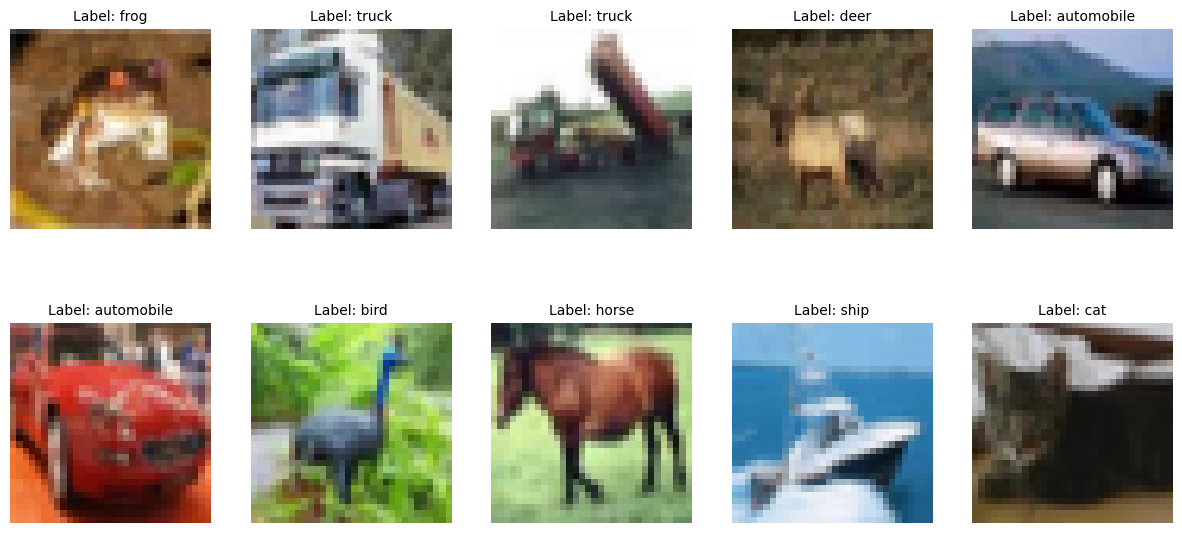

In [ ]:
# Plot 10 sample images from the CIFAR-10 training set with their corresponding class labels.
fig, ax = plt.subplots(2, 5, figsize=(15, 7))  # Create a 2x5 grid of subplots.
ax = ax.flatten()  # Flatten the axes array for easy iteration.

# Display the first 10 training images along with their human-readable class names.
for i, (image, label) in enumerate(zip(x_train[:10], y_train[:10])):
    ax[i].imshow(image)  # Show the image (in RGB).

    # Decode the one-hot encoded label back to its class index, then get the class name.
    ax[i].set_title(f"Label: {class_name[label.argmax()]}", fontsize=10)
    ax[i].axis('off')  # Hide axis ticks for cleaner visualization.

## **Training the Model**

### **Model Description (CIFAR-10 CNN)**

This convolutional neural network (CNN) is designed for image classification on the CIFAR-10 dataset. The architecture includes multiple convolutional blocks, each followed by regularization techniques such as dropout and batch normalization to improve performance and reduce overfitting.

* **Input Layer**: Accepts RGB images of shape (32, 32, 3).

* **Convolutional Blocks**:

  * **Block 1**: Two convolutional layers with 32 filters each, followed by max pooling, dropout (25%), and batch normalization.
  * **Block 2**: Two convolutional layers with 64 filters, followed by max pooling, dropout (25%), and batch normalization.
  * **Block 3**: Two convolutional layers with 128 filters, followed by max pooling, dropout (25%), and batch normalization.
  * **Block 4**: Two convolutional layers with 256 filters, followed by max pooling, dropout (25%), and batch normalization.

* **Fully Connected Layers**:

  * Dense layer with 512 units (ReLU activation) and dropout (50%).
  * Dense layer with 64 units (ReLU activation) and dropout (50%).

* **Output Layer**: Dense layer with 10 units and softmax activation to classify the input image into one of 10 CIFAR-10 classes.

The model is compiled using the **Adam optimizer**, with **categorical cross-entropy** as the loss function and **accuracy** as the evaluation metric.


In [ ]:
# Define a deeper Convolutional Neural Network (CNN) for CIFAR-10 image classification.
model = tf.keras.models.Sequential([
    # First convolutional block: two Conv2D layers followed by pooling, dropout, and batch normalization
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    # Second convolutional block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    # Third convolutional block
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    # Fourth convolutional block
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    # Flatten feature maps to feed into dense layers
    tf.keras.layers.Flatten(),

    # Fully connected layers with dropout for regularization
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    # Output layer with 10 units (one per class) and softmax activation
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

I0000 00:00:1756224542.634290  352940 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1022 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:d5:00.0, compute capability: 8.6
I0000 00:00:1756224542.635541  352940 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22477 MB memory:  -> device: 1, name: Quadro RTX 6000, pci bus id: 0000:17:00.0, compute capability: 7.5
I0000 00:00:1756224542.636652  352940 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 45434 MB memory:  -> device: 2, name: Quadro RTX 8000, pci bus id: 0000:73:00.0, compute capability: 7.5


### Visualize the CNN Architecture

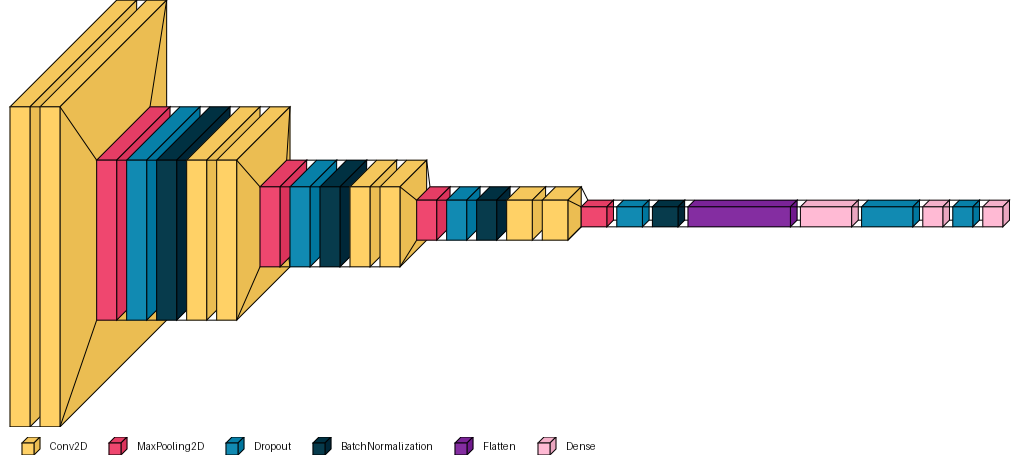

In [ ]:
import visualkeras
# Display a layered visual representation of the model architecture.
# 'scale_xy' controls the scaling of the diagram.
# 'legend=True' shows layer types with corresponding color codes.
visualkeras.layered_view(model, scale_xy=10, legend=True)

### Model Summary

In [ ]:
# Print a detailed summary of the model architecture,
# including layer types, output shapes, and number of parameters.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             

 Total params: 1,732,458 (6.61 MB)

 Trainable params: 1,731,498 (6.61 MB)

 Non-trainable params: 960 (3.75 KB)

### Visualize Model Architecture Diagram

In [ ]:
# Generate and display a plot of the model architecture,
# showing each layer’s name and output shape.
# tf.keras.utils.plot_model(model, show_shapes=True, dpi = 75)

### Train the model

In [ ]:
# Train the model on the training data for 250 epochs.
# The history object stores training metrics and loss values.
# history = model.fit(x_train, y_train, batch_size=128, epochs = 250)

Epoch 1/250


I0000 00:00:1756140614.455878   66078 service.cc:148] XLA service 0x79530800c440 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756140614.455935   66078 service.cc:156]   StreamExecutor device (0): NVIDIA RTX A6000, Compute Capability 8.6
I0000 00:00:1756140614.455940   66078 service.cc:156]   StreamExecutor device (1): Quadro RTX 6000, Compute Capability 7.5
I0000 00:00:1756140614.455943   66078 service.cc:156]   StreamExecutor device (2): Quadro RTX 8000, Compute Capability 7.5
2025-08-25 11:50:14.542941: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1756140614.941365   66078 cuda_dnn.cc:529] Loaded cuDNN version 91200


 26/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1166 - loss: 2.8467

I0000 00:00:1756140621.073316   66078 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.2382 - loss: 2.0172
Epoch 2/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4109 - loss: 1.5748
Epoch 3/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5378 - loss: 1.3208
Epoch 4/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6108 - loss: 1.1480
Epoch 5/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6619 - loss: 1.0144
Epoch 6/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6939 - loss: 0.9220
Epoch 7/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7194 - loss: 0.8471
Epoch 8/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7417 - loss: 0.7909
Epoch 9/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7557 - loss: 0.7499
Epoch 10/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7724 - loss: 0.7098
Epoch 11/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7829 - loss: 0.6739
Epoch 12/250
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/st

### Save/load the model

In [ ]:
# Define the path where the trained model will be saved
model_path = './cifar10_cnn_model.keras'

# If you have trained your own model and want to save it, uncomment and run:
# model.save(model_path)


# Otherwise, load the pretrained model provided (e.g., from GitHub or another source).
# !wget https://raw.githubusercontent.com/mnazari123/SecAI_Workshop_Data/main/Models/cifar10_cnn_model.keras -O cifar10_cnn_model.keras
# model = tf.keras.models.load_model('cifar10_cnn_model.keras')

# Display the model architecture summary to make sure the model has successfully been loaded.
# model.summary()


## Evaluate model accuracy on test data.

In [ ]:
# Evaluate the model on the test dataset and get loss and accuracy.
loss_test, accuracy_test = model.evaluate(x_test, y_test)

# Print the test accuracy as a percentage.
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

I0000 00:00:1756224554.517699  353372 service.cc:148] XLA service 0x7b2c3c00c450 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756224554.517739  353372 service.cc:156]   StreamExecutor device (0): NVIDIA RTX A6000, Compute Capability 8.6
I0000 00:00:1756224554.517747  353372 service.cc:156]   StreamExecutor device (1): Quadro RTX 6000, Compute Capability 7.5
I0000 00:00:1756224554.517751  353372 service.cc:156]   StreamExecutor device (2): Quadro RTX 8000, Compute Capability 7.5
2025-08-26 11:09:14.535911: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1756224554.603639  353372 cuda_dnn.cc:529] Loaded cuDNN version 91200


  1/313 ━━━━━━━━━━━━━━━━━━━━ 12:39 2s/step - accuracy: 0.1250 - loss: 2.3028

I0000 00:00:1756224556.074972  353372 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1003 - loss: 2.3025
Accuracy on test data: 10.03%


### Wrap the Keras Model with an ART Classifier

In [ ]:
# Create an ART KerasClassifier to enable adversarial robustness tools.
# 'clip_values' defines the input data range for normalization and attack generation.
classifier = KerasClassifier(model=model, clip_values=(min_val, max_val))

## **Projected Gradient Descent (PGD)**

### Overview

> class art.attacks.evasion.ProjectedGradientDescent(estimator: CLASSIFIER_LOSS_GRADIENTS_TYPE | OBJECT_DETECTOR_TYPE, norm: int | float | str = inf, eps: int | float | ndarray = 0.3, eps_step: int | float | ndarray = 0.1, decay: float | None = None, max_iter: int = 100, targeted: bool = False, num_random_init: int = 0, batch_size: int = 32, random_eps: bool = False, summary_writer: str | bool | SummaryWriter = False, verbose: bool = True)

The Projected Gradient Descent attack is an iterative method in which, after each iteration, the perturbation is projected on an lp-ball of specified radius (in addition to clipping the values of the adversarial sample so that it lies in the permitted data range). This is the attack proposed by Madry et al. for adversarial training.
* Paper link: https://arxiv.org/abs/1706.06083

*\_\_init__(estimator: CLASSIFIER_LOSS_GRADIENTS_TYPE | OBJECT_DETECTOR_TYPE, norm: int | float | str = inf, eps: int | float | ndarray = 0.3, eps_step: int | float | ndarray = 0.1, decay: float | None = None, max_iter: int = 100, targeted: bool = False, num_random_init: int = 0, batch_size: int = 32, random_eps: bool = False, summary_writer: str | bool | SummaryWriter = False, verbose: bool = True)*

**Create a ProjectedGradientDescent instance.**

    Parameters:
* estimator – An trained estimator.
* norm – The norm of the adversarial perturbation supporting “inf”, np.inf, 1 or 2.
* eps – Maximum perturbation that the attacker can introduce.
* eps_step – Attack step size (input variation) at each iteration.
* random_eps (bool) – When True, epsilon is drawn randomly from truncated normal distribution. The literature suggests this for FGSM based training to generalize across different epsilons. eps_step is modified to preserve the ratio of eps / eps_step. The effectiveness of this method with PGD is untested (https://arxiv.org/pdf/1611.01236.pdf).
* decay – Decay factor for accumulating the velocity vector when using momentum.
* max_iter (int) – The maximum number of iterations.
* targeted (bool) – Indicates whether the attack is targeted (True) or untargeted (False).
* num_random_init (int) – Number of random initialisations within the epsilon ball. For num_random_init=0 starting at the original input.
* batch_size (int) – Size of the batch on which adversarial samples are generated.
* summary_writer – Activate summary writer for TensorBoard. Default is False and deactivated summary writer. If True save runs/CURRENT_DATETIME_HOSTNAME in current directory. If of type str save in path. If of type SummaryWriter apply provided custom summary writer. Use hierarchical folder structure to compare between runs easily. e.g. pass in ‘runs/exp1’, ‘runs/exp2’, etc. for each new experiment to compare across them.
* verbose (bool) – Show progress bars.

    
**generate(x: ndarray, y: ndarray | None = None, \*\*kwargs) → ndarray**
Generate adversarial samples and return them in an array.
    
    
    Return type:
* ndarray
    
    
    Parameters:
* x (ndarray) – An array with the original inputs.
* y – Target values (class labels) one-hot-encoded of shape (nb_samples, nb_classes) or indices of shape (nb_samples,). Only provide this parameter if you’d like to use true labels when crafting adversarial samples. Otherwise, model predictions are used as labels to avoid the “label leaking” effect (explained in this paper: https://arxiv.org/abs/1611.01236). Default is None.
* mask (np.ndarray) – An array with a mask broadcastable to input x defining where to apply adversarial perturbations. Shape needs to be broadcastable to the shape of x and can also be of the same shape as x. Any features for which the mask is zero will not be adversarially perturbed.


    Returns:
* An array holding the adversarial examples.

    
**set_params(\*\*kwargs) → None**

Take in a dictionary of parameters and apply attack-specific checks before saving them as attributes.

    Parameters:
* kwargs – A dictionary of attack-specific parameters.

    
    property summary_writer
* The summary writer.

Link: https://adversarial-robustness-toolbox.readthedocs.io/en/latest/modules/attacks/evasion.html#projected-gradient-descent-pgd



### Create a ART Projected Gradient Descent attack.

In [ ]:
# eps – defines the attack step size (input variation). The smaller the eps, the little the attack scale would be.
attack_pgd = ProjectedGradientDescent(estimator=classifier, eps=0.01)

### Generate adversarial test data.

In [ ]:
# Reduce test set size to 500 samples for faster adversarial generation and evaluation.
x_test = x_test[:500]
y_test = y_test[:500]

# Generate adversarial examples from the reduced test set using the PGD attack.
x_test_adv = attack_pgd.generate(x_test)

2025-08-26 11:09:28.366689: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.32GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
PGD - Random Initializations: 100%|██████████| 1/1 [00:04<00:00,  4.26s/it]


### Save or Load PGD-Generated Adversarial Test Data

In [ ]:
# Option 1: Save your newly generated adversarial test data (uncomment to use).
pgd_data_path = 'pgd_poison_data_cifar10_test_S500.npz'
np.savez(pgd_data_path,
         x_test_adv=x_test_adv, y_test_adv=y_test)

# Option 2: Load previously saved adversarial test data (recommended for reuse or quick experiments).
# Download the data file from GitHub raw URL
# !wget https://raw.githubusercontent.com/mnazari123/SecAI_Workshop_Data/main/data/pgd_poison_data_cifar10_test_S500.npz

# x_test_data = np.load(pgd_data_path)
# x_test_adv, y_test = x_test_data['x_test_adv'], x_test_data['y_test_adv']
# x_test_adv.shape, y_test.shape

### Visualise the first adversarial test sample.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


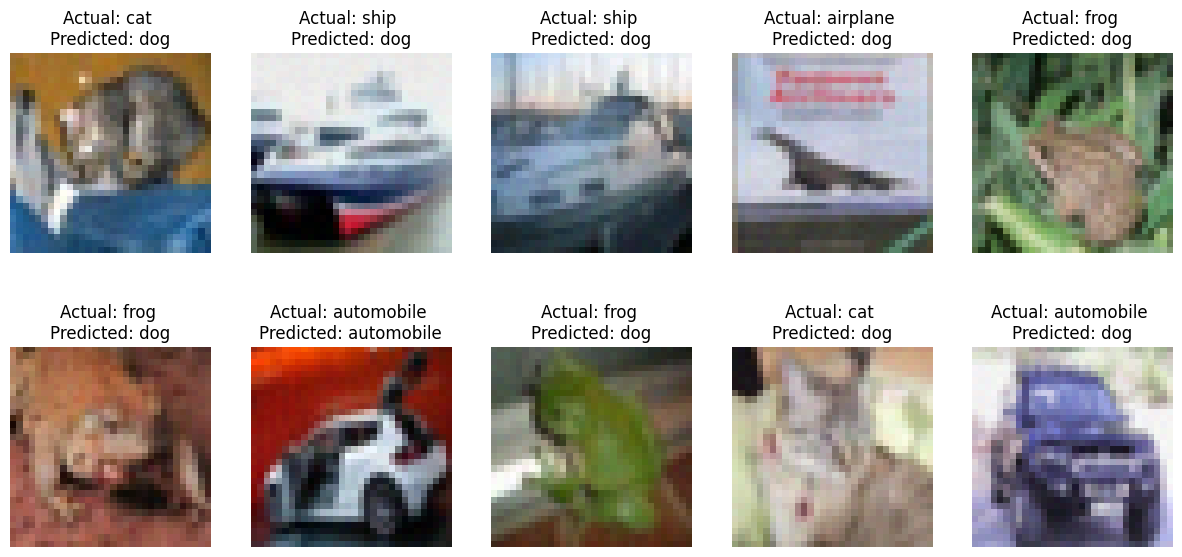

In [ ]:
# Display the first 10 adversarial examples along with their actual and predicted labels.
fig, ax = plt.subplots(2, 5, figsize=(15, 7))
ax = ax.flatten()

for i, (image, label) in enumerate(zip(x_test_adv[:10], y_test[:10])):
    # Display the adversarial image.
    ax[i].imshow(image)

    # Show actual and predicted labels.
    prediction = model.predict(np.expand_dims(image, axis=0)).argmax()
    ax[i].set_title(f"Actual: {class_name[label.argmax()]} \nPredicted: {class_name[prediction]}", fontsize=12)
    ax[i].axis('off')


### Evaluate the Model on Adversarial Test Data

In [ ]:
# Evaluate model performance on adversarial examples.
loss_test, accuracy_test = model.evaluate(x_test_adv, y_test)

# Calculate the average perturbation introduced by the adversarial attack.
perturbation = np.mean(np.abs(x_test_adv - x_test))

# Print evaluation results.
print('Accuracy on adversarial test data: {:4.2f}%'.format(accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(perturbation))

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.0960 - loss: 2.3026
Accuracy on adversarial test data: 9.60%
Average perturbation: 0.01


## Prepare Training Data for Adversarial Sample Detector

In [ ]:
# Generate new adversarial examples from a subset of the training data using PGD.
x_train_adv = attack_pgd.generate(x_train[:500])
nb_train = x_train[:500].shape[0]

# Combine clean and adversarial samples to create a binary classification dataset for detection.
x_train_detector = np.concatenate((x_train[:500], x_train_adv), axis=0)

# Create labels: [1, 0] for clean samples, [0, 1] for adversarial samples.
y_train_detector = np.concatenate((
    np.array([[1, 0]] * nb_train),  # Clean
    np.array([[0, 1]] * nb_train)   # Adversarial
), axis=0)

PGD - Random Initializations: 100%|██████████| 1/1 [00:03<00:00,  3.97s/it]


### Save or Load Adversarial Detector Training Data

In [ ]:
# Option 1: Save generated clean and adversarial samples for training the detector.
np.savez('./pgd_poison_data_cifar10_train_S1000.npz',
         x_train_detector=x_train_detector, y_train_detector=y_train_detector)

# Option 2: Load pre-saved detector training data to avoid regeneration.
# detector_data = np.load('./pgd_generated_data/pgd_detector_generated_cifar10.npz')
# x_train_detector, y_train_detector = detector_data['x_train_detector'], detector_data['y_train_detector']

# Verify the shape of loaded or prepared data.
# x_train_detector.shape, y_train_detector.shape

## Build a similar CNN architecture model for detecting Adversarial Inputs

In [ ]:
detector_model = tf.keras.models.Sequential([
    # First convolutional block: two Conv2D layers followed by pooling, dropout, and batch normalization
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    # Second convolutional block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    # Third convolutional block
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    # Fourth convolutional block
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    # Flatten feature maps to feed into dense layers
    tf.keras.layers.Flatten(),

    # Fully connected layers with dropout for regularization
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    # Output layer with 2 units (one per class) and softmax activation
    tf.keras.layers.Dense(2, activation='softmax') # Two output classes: [clean, adversarial]
])

# Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric
detector_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


### Train the Adversarial Detector Model

In [ ]:
# Train the adversarial detector model for 10 epochs.
# Since the goal is to distinguish between clean and adversarial inputs,
# a few epochs (e.g., 10) are typically sufficient to learn this binary classification task.
history = detector_model.fit(x_train_detector, y_train_detector, epochs=10)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 167ms/step - accuracy: 0.4710 - loss: 1.0037
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4850 - loss: 0.7812
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4740 - loss: 0.7312
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4840 - loss: 0.7043
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5330 - loss: 0.6898
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5220 - loss: 0.6956
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5230 - loss: 0.6983
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5250 - loss: 0.6983
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4650 - loss: 0.7028
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5010 - loss: 0.6999


In [ ]:
# Define path to save/load the detector model
detector_model_path = './PGD_detector_model_cifar10.keras'
# detector_model.save(detector_model_path)

# Load the pre-trained detector model from the specified path
# detector_model = tf.keras.models.load_model(path)

# Display the model architecture to make sure the models has been loaded successfully.
detector_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             

 Total params: 5,193,896 (19.81 MB)

 Trainable params: 1,730,978 (6.60 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 3,461,958 (13.21 MB)

## Prepare test samples for the detector model

In [ ]:
# Get the number of original test samples
nb_test = x_test.shape[0]

# Combine clean and adversarial test images into one array
x_test_detector = np.concatenate((x_test, x_test_adv), axis=0)

# Create corresponding labels: [1, 0] for clean, [0, 1] for adversarial
y_test_detector = np.concatenate((np.array([[1, 0]] * nb_test),
                                  np.array([[0, 1]] * nb_test)), axis=0)

### Evaluat the result



In [ ]:
loss_test, accuracy_test = detector_model.evaluate(x_test_detector, y_test_detector)
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

### Wrap detector model for adversarial detection

In [ ]:
# Wrap the Keras detector model with ART's KerasClassifier
detector_classifier = KerasClassifier(clip_values=(0.0, 0.1), model=detector_model, use_logits=False)

# Create a BinaryInputDetector using the wrapped classifier
detector = BinaryInputDetector(detector_classifier)

## Train the BinaryInputDetector

In [ ]:
# Train the detector on labeled clean and adversarial training data
detector.fit(x_train_detector, y_train_detector, nb_epochs=10, batch_size=32)

#### Evaluating the detector

In [ ]:
# Apply the detector to the adversarial test data
_, is_adversarial = detector.detect(x_test_adv)

# Count how many adversarial samples were flagged
flag_adv = np.sum(is_adversarial)

# Display detection results
print("Adversarial test data (first 500 images):")
print("Flagged: {}".format(flag_adv))
print("Not flagged: {}".format(500 - flag_adv))

Adversarial test data (first 500 images):
Flagged: 234
Not flagged: 266


#### Evaluating the detector on clean (non-adversarial) data

In [ ]:
# Apply the detector to the first 500 clean test samples
_, is_adversarial = detector.detect(x_test[:500])

# Count how many clean samples were incorrectly flagged as adversarial
flag_original = np.sum(is_adversarial)

# Display detection results
print("Original test data (first 500 images):")
print("Flagged: {}".format(flag_original))
print("Not flagged: {}".format(500 - flag_original))

Original test data (first 500 images):
Flagged: 240
Not flagged: 260


#### Evaluate the detector across different attack strengths (eps values)

In [ ]:
# Note: Detector was trained with adversarial samples generated using eps = 0.2

eps_range = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
nb_flag_adv = []      # Number of adversarial examples flagged by the detector
nb_missclass = []     # Number of adversarial examples that fooled the classifier

for eps in eps_range:
    # Update PGD attack with current epsilon
    attack_pgd.set_params(**{'eps': eps})

    # Generate adversarial examples for current eps
    x_test_adv = attack_pgd.generate(x_test[:100])

    # Count how many were flagged by the detector
    nb_flag_adv.append(np.sum(detector.detect(x_test_adv)[1]))

    # Count how many were misclassified by the classifier
    nb_missclass.append(
        np.sum(np.argmax(classifier.predict(x_test_adv), axis=1) != np.argmax(y_test[:100], axis=1))
    )

# Add clean data evaluation (eps=0) to the results
eps_range = [0] + eps_range
nb_flag_adv = [flag_original] + nb_flag_adv  # flag_original from clean data detection
nb_missclass = [2] + nb_missclass            # 2 misclassifications in clean test subset

PGD - Random Initializations: 100%|██████████| 1/1 [00:04<00:00,  4.07s/it]


PGD - Random Initializations: 100%|██████████| 1/1 [00:03<00:00,  3.84s/it]


#### Plot detector performance vs. classifier errors for varying attack strengths

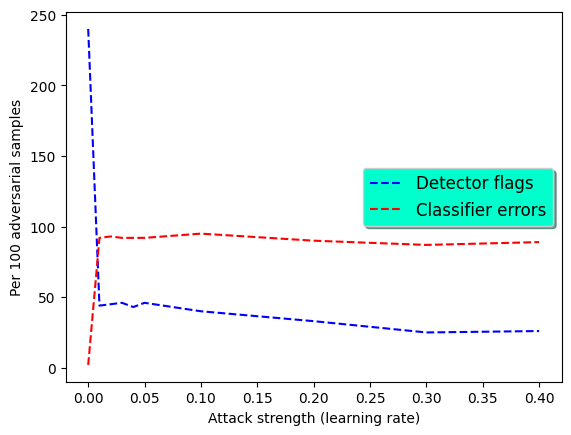

In [ ]:
fig, ax = plt.subplots()

# Plot number of adversarial samples flagged by the detector
ax.plot(np.array(eps_range)[:10], np.array(nb_flag_adv)[:10], 'b--', label='Detector flags')

# Plot number of adversarial samples misclassified by the classifier
ax.plot(np.array(eps_range)[:10], np.array(nb_missclass)[:10], 'r--', label='Classifier errors')

# Customize legend
legend = ax.legend(loc='center right', shadow=True, fontsize='large')
legend.get_frame().set_facecolor('#00FFCC')

# Add axis labels
plt.xlabel('Attack strength (eps)')
plt.ylabel('Per 100 adversarial samples')

# Display the plot
plt.show()

## **Summary of PGD Attack Implementation on CIFAR10**


#### **Overview**

I have implemented the Projected Gradient Descent (PGD) attack on the CIFAR-10 dataset, which contains 60,000 color images in 10 different classes. The PGD attack is a prominent adversarial attack technique used to evaluate the robustness of machine learning models, especially deep neural networks, against adversarial perturbations. This summary provides an explanation of the PGD attack, details its implementation, and discusses the impact of the perturbation magnitude (epsilon, $ε$) on the attack's effectiveness.

#### **PGD Attack Mechanism**

The PGD attack is an iterative method that generates adversarial examples by applying small perturbations to the input data. The goal is to make these perturbed inputs cause the model to produce incorrect outputs while remaining visually similar to the original inputs. The key steps of the PGD attack are as follows:

1. **Initialization**: Start with an original input sample $x$ from the dataset.
2. **Perturbation**: Add a small, carefully chosen perturbation ηη to the input $x$ such that the new input $x′=x+η$ misleads the model. The perturbation is bounded by a parameter $ϵ$ (epsilon), which controls the maximum allowed distortion.
3. **Iterative Optimization**: Apply gradient ascent iteratively to maximize the model's loss with respect to the input $x′$. After each iteration, project $x′$ back into the $ϵ$-ball around $x$ to ensure the perturbation remains within the specified bounds.

Mathematically, the PGD attack can be formulated as:
$$xt+1′=clipx,ϵ(xt′+α⋅sign(∇xL(θ,xt′,y)))$$
where $clipx,ϵ$ projects the perturbed input back into the $ϵ$-ball around $x, α$ is the step size, $∇xL(θ,xt′,y)$ is the gradient of the loss with respect to the input, and $L$ is the loss function.

#### **Impact of Epsilon ($ε$)**

The parameter ϵϵ plays a critical role in determining the effectiveness of the PGD attack. It defines the maximum amount of perturbation allowed for each input. The impact of ϵϵ can be summarized as follows:

* Small $ϵ$: When ϵϵ is small, the perturbations are minimal, and the adversarial examples remain very close to the original inputs. This might lead to limited success in fooling the model, especially if the model is robust to small perturbations.
* Large $ϵ$: As $ϵ$ increases, the perturbations become more noticeable, potentially making the adversarial examples more effective in causing misclassification. However, very large $ϵ$ values can result in perturbed inputs that no longer resemble the original data, which may be unrealistic in practical scenarios.

The trade-off is to find an optimal $ϵ$ that balances the attack's success rate and the visual similarity of the adversarial examples to the original inputs.

#### **Results and Observations**

In the implementation on the CIFAR10 dataset, varying ϵϵ values demonstrated the following:

* Low $ϵ$ (e.g., 0.1): The model's accuracy drops slightly, indicating that minor perturbations are not significantly affecting the model's predictions.
* Moderate $ϵ$ (e.g., 0.3): The model's accuracy decreases more substantially, suggesting that the adversarial examples are effectively misleading the model.
* High $ϵ$ (e.g., 0.5): The model's accuracy drops drastically, but the perturbations become more visible, potentially compromising the adversarial example's subtlety.

#### **Conclusion**

The PGD attack on CIFAR10 illustrates the vulnerability of neural networks to adversarial examples and highlights the importance of robust model training. The choice of ϵϵ is crucial, as it influences both the effectiveness of the attack and the perceptual similarity of the adversarial examples to the original inputs. By experimenting with different ϵϵ values, one can understand the trade-offs involved and work towards developing more resilient machine learning models.